In [1]:
import os, shutil
import os, random
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers


original_close_dir = 'E:/DS8/FinalProject/Deep_Project/closes'
original_open_dir = 'E:/DS8/FinalProject/Deep_Project/opens'

In [ ]:
base_dir = 'C:/Users/sepehr/Data_Project/close&open'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training close pictures
train_close_dir = os.path.join(train_dir, 'close')
os.mkdir(train_close_dir)

# Directory with our validation close pictures
validation_close_dir = os.path.join(validation_dir, 'close')
os.mkdir(validation_close_dir)

# Directory with our validation close pictures
test_close_dir = os.path.join(test_dir, 'close')
os.mkdir(test_close_dir)

# Directory with our training open pictures
train_open_dir = os.path.join(train_dir, 'open')
os.mkdir(train_open_dir)

# Directory with our validation open pictures
validation_open_dir = os.path.join(validation_dir, 'open')
os.mkdir(validation_open_dir)

# Directory with our validation open pictures
test_open_dir = os.path.join(test_dir, 'open')
os.mkdir(test_open_dir)  

# Copy first 1000 close images to train_close_dir
fnames_closetrain = [random.choice(os.listdir(original_close_dir)) for i in range(1300)]
for fname in fnames_closetrain:
    src = os.path.join(original_close_dir, fname)
    dst = os.path.join(train_close_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 close images to validation_close_dir
fnames_closevalid = []
for i in range(800):
    file = random.choice(os.listdir(original_close_dir))
    if(file in fnames_closetrain): continue
    else: fnames_closevalid.append(file)

for fname in fnames_closevalid:
    src = os.path.join(original_close_dir, fname)
    dst = os.path.join(validation_close_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 close images to test_close_dir
fnames_closetest = []
for i in range(800):
    file = random.choice(os.listdir(original_close_dir))
    if(file in fnames_closetrain or file in fnames_closevalid): continue
    else: fnames_closetest.append(file)
    
for fname in fnames_closetest:
    src = os.path.join(original_close_dir, fname)
    dst = os.path.join(test_close_dir, fname)
    shutil.copyfile(src, dst)  

# Copy first 1000 open images to train_open_dir
fnames_opentrain = [random.choice(os.listdir(original_open_dir)) for i in range(1300)]
for fname in fnames_opentrain:
    src = os.path.join(original_open_dir, fname)
    dst = os.path.join(train_open_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 open images to validation_open_dir
fnames_openvalid = []
for i in range(800):
    file = random.choice(os.listdir(original_open_dir))
    if(file in fnames_opentrain): continue
    else: fnames_openvalid.append(file)
        
for fname in fnames_openvalid:
    src = os.path.join(original_open_dir, fname)
    dst = os.path.join(validation_open_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 open images to test_open_dir
fnames_opentest = []
for i in range(800):
    file = random.choice(os.listdir(original_open_dir))
    if(file in fnames_opentest or file in fnames_openvalid): continue
    else: fnames_opentest.append(file)
        
for fname in fnames_opentest:
    src = os.path.join(original_open_dir, fname)
    dst = os.path.join(test_open_dir, fname)
    shutil.copyfile(src, dst)

Data preprocessing

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/sepehr/Data_Project/close&open/train',
        target_size=(40, 40),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'C:/Users/sepehr/Data_Project/close&open/validation',
        target_size=(40, 40),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 40, 40, 3)
labels batch shape: (20,)


model architecture

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(40, 40, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         1

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [6]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 8s 70ms/step - loss: 0.3932 - acc: 0.8545 - val_loss: 0.2393 - val_acc: 0.9080
Epoch 2/30
100/100 [==============================] - 4s 36ms/step - loss: 0.2034 - acc: 0.9230 - val_loss: 0.1564 - val_acc: 0.9420
Epoch 3/30
100/100 [==============================] - 4s 39ms/step - loss: 0.1466 - acc: 0.9470 - val_loss: 0.1054 - val_acc: 0.9710
Epoch 4/30
100/100 [==============================] - 4s 41ms/step - loss: 0.1077 - acc: 0.9605 - val_loss: 0.1088 - val_acc: 0.9640
Epoch 5/30
100/100 [==============================] - 4s 39ms/step - loss: 0.0864 - acc: 0.9700 - val_loss: 0.0597 - val_acc: 0.9830
Epoch 6/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0677 - acc: 0.9765 - val_loss: 0.0607 - val_acc: 0.9840
Epoch 7/30
100/100 [==============================] - 4s 41ms/step - loss: 0.0642 - acc: 0.9785 - val_loss: 0.0725 - val_acc: 0.9720
Epoch 8/30
100/100 [==============================] - 4s 41ms/step - 

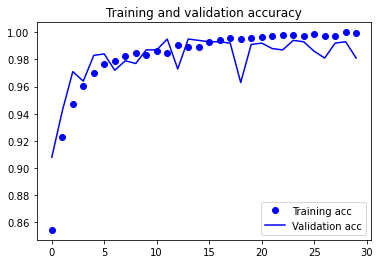

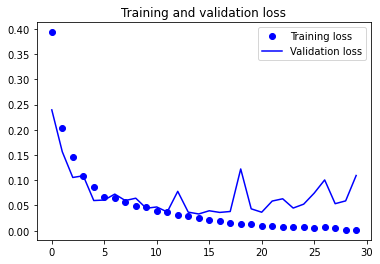

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()